# Tax Liability Comparison after Budget 2020
##### Author: Pranjal Singh

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Various Functions

In [2]:
def calculate_hra_exemption(basic_salary, house_rent_allowance, rent_paid_yearly, is_metro_city):
    clause1 = house_rent_allowance
    clause2 = rent_paid_yearly - 0.1 * basic_salary
    clause3 = 0.5 * basic_salary if is_metro_city == "Y" else 0.4 * basic_salary
    return max(0, min(clause1, clause2, clause3))

In [3]:
def calculate_professional_tax(gross_salary, state_of_residence):
    if state_of_residence == "Andhra Pradesh" or state_of_residence == "Telangana":
        if 15000 < gross_salary <= 20000:
            return 150
        elif gross_salary > 20000:
            return 200
        else:
            return 0
    elif state_of_residence == "Assam":
        if 10000 < gross_salary <= 15000:
            return 150
        elif 15000 < gross_salary < 25000:
            return 180
        elif gross_salary >= 25000:
            return 208
        else:
            return 0
    elif state_of_residence == "Bihar":
        if 25000 < gross_salary <= 41666:
            return 83.33
        elif 41666 < gross_salary <= 83333:
            return 166.67
        elif gross_salary >= 83334:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Goa":
        if 15000 < gross_salary <= 25000:
            return 150
        elif gross_salary > 25000:
            return 200
        else:
            return 0
    elif state_of_residence == "Gujarat":
        if 6000 <= gross_salary < 9000:
            return 80
        elif 9000 <= gross_salary < 12000:
            return 150
        elif gross_salary >= 12000:
            return 200
        else:
            return 0
    elif state_of_residence == "Jharkhand":
        if 25000 < gross_salary < 41667:
            return 100
        elif 41667 <= gross_salary < 66667:
            return 150
        elif 66667 <= gross_salary < 83334:
            return 175
        elif gross_salary >= 83334:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Karnataka":
        if gross_salary > 15000:
            return 200
        else:
            return 0
    elif state_of_residence == "Kerala":
        if 2000 <= gross_salary < 3000:
            return 20
        elif 3000 <= gross_salary < 5000:
            return 30
        elif 5000 <= gross_salary < 7500:
            return 50
        elif 7500 <= gross_salary < 10000:
            return 75
        elif 10000 <= gross_salary < 12500:
            return 100
        elif 12500 <= gross_salary < 16667:
            return 125
        elif 16667 <= gross_salary < 20834:
            return 166
        elif gross_salary >= 20834:
            return 208
        else:
            return 0
    elif state_of_residence == "Madhya Pradesh":
        if 18750 < gross_salary <= 25000:
            return 125
        elif 25000 < gross_salary <= 33333:
            return 167
        elif gross_salary > 33333:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Maharashtra":
        if 7500 < gross_salary <= 10000:
            return 175
        elif gross_salary > 10000:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Manipur":
        if 4250 < gross_salary <= 6250:
            return 100
        elif 6250 < gross_salary <= 8333:
            return 167
        elif 8333 < gross_salary <= 10416:
            return 200
        elif gross_salary > 10416:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Meghalaya":
        if 4166 < gross_salary <= 6250:
            return 16.5
        elif 6250 < gross_salary <= 8333:
            return 25
        elif 8333 < gross_salary <= 12500:
            return 41.5
        elif 12500 < gross_salary <= 16666:
            return 62.5
        elif 16666 < gross_salary <= 20833:
            return 83.33
        elif 20833 < gross_salary <= 25000:
            return 104.16
        elif 25000 < gross_salary <= 29166:
            return 125
        elif 29166 < gross_salary <= 33333:
            return 150
        elif 33333 < gross_salary <= 37500:
            return 175
        elif 37500 < gross_salary <= 41666:
            return 200
        elif gross_salary > 41666:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Nagaland":
        if 4000 < gross_salary <= 5000:
            return 35
        elif 5000 < gross_salary <= 7000:
            return 75
        elif 7000 < gross_salary <= 9000:
            return 110
        elif 9000 < gross_salary <= 12000:
            return 180
        elif gross_salary > 12000:
            return 208
        else:
            return 0
    elif state_of_residence == "Odisha":
        if 13304 < gross_salary <= 25000:
            return 125
        elif gross_salary > 25000:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Puducherry":
        if 16666 < gross_salary <= 33333:
            return 41.66
        elif 33333 < gross_salary <= 50000:
            return 83.33
        elif 50000 < gross_salary <= 66666:
            return 125
        elif 66666 < gross_salary <= 83333:
            return 166.67
        elif gross_salary > 83333:
            return 208.33
        else:
            return 0
    elif state_of_residence == "Punjab":
        if gross_salary > 20833:
            return 200
        else:
            return 0
    elif state_of_residence == "Sikkim":
        if 20000 < gross_salary <= 30000:
            return 125
        elif 30000 < gross_salary <= 40000:
            return 150
        elif gross_salary > 40000:
            return 200
        else:
            return 0
    elif state_of_residence == "Tamil Nadu":
        if 3500 < gross_salary <= 5000:
            return 22.5
        elif 5000 < gross_salary <= 7500:
            return 52.5
        elif 7500 < gross_salary <= 10000:
            return 115
        elif 10000 < gross_salary <= 12500:
            return 171
        elif gross_salary > 12500:
            return 208
        else:
            return 0
    elif state_of_residence == "Tripura":
        if 5000 < gross_salary <= 7000:
            return 70
        elif 7000 < gross_salary <= 9000:
            return 120
        elif 9000 < gross_salary <= 12000:
            return 140
        elif 12000 < gross_salary <= 15000:
            return 190
        elif gross_salary > 15000:
            return 208
        else:
            return 0
    elif state_of_residence == "West Bengal":
        if 10000 < gross_salary <= 15000:
            return 110
        elif 15000 < gross_salary <= 25000:
            return 130
        elif 25000 < gross_salary <= 40000:
            return 150
        elif gross_salary > 40000:
            return 200
        else:
            return 0
    else:
        return 0
    

In [4]:
def calculate_old_tax_liability(net_taxable_income_old):
    tax_value = 0
    if 250000 <= net_taxable_income_old < 500000:
        tax_value = 0.05 * (net_taxable_income_old - 250000)
    elif 500000 <= net_taxable_income_old < 1000000:
        tax_value = 12500 + 0.2 * (net_taxable_income_old - 500000)
    elif net_taxable_income_old >= 1000000:
        tax_value = 12500 + 100000 + 0.3 * (net_taxable_income_old - 1000000)
    return round(tax_value)

In [5]:
def calculate_new_tax_liability(net_taxable_income_new):
    tax_value = 0
    if 250000 <= net_taxable_income_new < 500000:
        tax_value = 0.05 * (net_taxable_income_new - 250000)
    elif 500000 <= net_taxable_income_new < 750000:
        tax_value = 12500 + 0.1 * (net_taxable_income_new - 500000)
    elif 750000 <= net_taxable_income_new < 1000000:
        tax_value = 12500 + 25000 + 0.15 * (net_taxable_income_new - 750000)
    elif 1000000 <= net_taxable_income_new < 1250000:
        tax_value = 12500 + 25000 + 37500 + 0.2 * (net_taxable_income_new - 1000000)
    elif 1250000 <= net_taxable_income_new < 1500000:
        tax_value = 12500 + 25000 + 37500 + 50000 + 0.25 * (net_taxable_income_new - 1250000)
    elif net_taxable_income_new >= 1500000:
        tax_value = 12500 + 25000 + 37500 + 50000 + 62500 + 0.3 * (net_taxable_income_new - 1500000)
    return round(tax_value)

In [6]:
def calculate_rebate87a(net_taxable_income, home_loan_sec24_deduction, income_tax):
    if net_taxable_income + home_loan_sec24_deduction <= 500000:
        if income_tax < 12500:
            return income_tax
        else:
            return 12500
    else:
        return 0

In [7]:
def calculate_surcharge(net_taxable_income, income_tax):
    if 5000000 < net_taxable_income <= 10000000:
        return round(0.1 * income_tax)
    elif 10000000 < net_taxable_income <= 20000000:
        return round(0.15 * income_tax)
    elif 20000000 < net_taxable_income <= 50000000:
        return round(0.25 * income_tax)
    elif net_taxable_income > 50000000:
        return round(0.37 * income_tax)
    else:
        return 0

In [8]:
def calculate_marginal_relief(net_taxable_income, surcharge):
    if 5000000 < net_taxable_income <= 10000000:
        return round(max(0, surcharge - 0.7 * (net_taxable_income - 5000000)))
    elif 10000000 < net_taxable_income <= 20000000:
        return round(max(0, surcharge - 0.7 * (net_taxable_income - 10000000)))
    elif 20000000 < net_taxable_income <= 50000000:
        return round(max(0, surcharge - 0.7 * (net_taxable_income - 20000000)))
    elif net_taxable_income > 50000000:
        return round(max(0, surcharge - 0.7 * (net_taxable_income - 50000000)))
    else:
        return 0

# Income Parameters

In [38]:
def tax_liability(gross_salary):
    basic_salary = round(gross_salary / 2)
    house_rent_allowance = round(basic_salary / 2)
    sec_80c_deduction = 150000
    sec_80d_deduction = 0
    sec_80ccd1b_nps_deduction = 0
    sec_80g_donation_deduction = 0
    savings_bank_interest_deduction = 1000
    home_loan_sec24_deduction = 0
    additional_home_loan_sec80eea_deduction = 0
    employers_contribution_nps_epf = 100000
    rent_paid_yearly = 180000
    is_metro_city = "N" #Y/N (delhi, mumbai, chennai, kolkata are metro cities)
    state_of_residence = "Karnataka"
    hra_exemption = round(calculate_hra_exemption(basic_salary, house_rent_allowance, rent_paid_yearly, \
                                                  is_metro_city))
    gross_salary_w_sec_10 = gross_salary - hra_exemption
    professional_tax = int(round(12* calculate_professional_tax(gross_salary, state_of_residence)))
    standard_deduction = 50000
    gross_total_income_old = gross_salary_w_sec_10 - professional_tax - standard_deduction
    gross_total_income_new = gross_salary
    net_taxable_income_old = gross_total_income_old - min(150000, sec_80c_deduction) - min(25000, sec_80d_deduction) \
    - min(50000, sec_80ccd1b_nps_deduction) - sec_80g_donation_deduction \
    + max(0, savings_bank_interest_deduction - 10000) - min(200000, home_loan_sec24_deduction) \
    - min(150000, additional_home_loan_sec80eea_deduction) + max(0, employers_contribution_nps_epf - 750000)

    net_taxable_income_new = gross_total_income_new + max(0, employers_contribution_nps_epf - 750000) \
    - min(150000, additional_home_loan_sec80eea_deduction)
    income_tax_old = calculate_old_tax_liability(net_taxable_income_old)
    income_tax_new = calculate_new_tax_liability(net_taxable_income_new)
    rebate_87a_old = calculate_rebate87a(net_taxable_income_old, home_loan_sec24_deduction, income_tax_old)
    rebate_87a_new = calculate_rebate87a(net_taxable_income_new, home_loan_sec24_deduction, income_tax_new)
    surcharge_old = calculate_surcharge(net_taxable_income_old, income_tax_old)
    surcharge_new = calculate_surcharge(net_taxable_income_new, income_tax_new)
    marginal_relief_old = calculate_marginal_relief(net_taxable_income_old, surcharge_old)
    marginal_relief_new = calculate_marginal_relief(net_taxable_income_new, surcharge_new)
    cess_old = round(0.04 * (income_tax_old - rebate_87a_old + surcharge_old - marginal_relief_old))
    cess_new = round(0.04 * (income_tax_new - rebate_87a_new + surcharge_new - marginal_relief_new))
    total_tax_liability_old = income_tax_old - rebate_87a_old + surcharge_old - marginal_relief_old + cess_old
    total_tax_liability_new = income_tax_new - rebate_87a_new + surcharge_new - marginal_relief_new + cess_new
    return total_tax_liability_old, total_tax_liability_new

# Plot

In [39]:
result = []
for gross_salary in range(300000, 5000000, 50000):
    total_tax_liability_old, total_tax_liability_new = tax_liability(gross_salary)
    result.append([gross_salary, total_tax_liability_old, total_tax_liability_new, total_tax_liability_old - total_tax_liability_new])

In [40]:
df = pd.DataFrame(result, columns=["Gross Salary", "old_tax", "new_tax", "Gain in New Regime"])

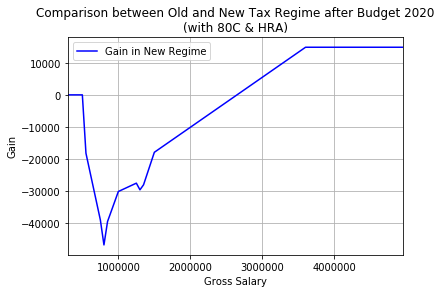

In [41]:
ax = plt.gca()
df.plot(kind='line',x='Gross Salary',y='Gain in New Regime',color='blue', ax=ax)
plt.ylabel('Gain')
plt.title('Comparison between Old and New Tax Regime after Budget 2020\n(with 80C & HRA)')
plt.grid()
plt.savefig("budget2020_plot.png")